In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Transactional Data.csv')

In [3]:
df.head()

,Order Number,Item Title,No of Items Ordered,Price per Item,Order Create Date,Delivery Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
df.describe()

,Order Number,Item Title,No of Items Ordered,Price per Item,Order Create Date,Delivery Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,18,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [5]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Order Number           545
Item Title             545
No of Items Ordered    545
Price per Item         545
Order Create Date      545
Delivery Address       545
dtype: int64

In [6]:
for col in df.columns: 
    print(col) 

Order Number
Item Title
No of Items Ordered
Price per Item
Order Create Date
Delivery Address


In [7]:
df = df.dropna(how = 'all') 

In [8]:
df.drop(df[df['Order Number']=='Order ID'].index, inplace = True) 

In [9]:
df.to_csv(r'data_3.csv', index = False)

In [10]:
df.head()

,Order Number,Item Title,No of Items Ordered,Price per Item,Order Create Date,Delivery Address
0,176558,USB-C Charging Cable,2,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
df.dtypes

Order Number           object
Item Title             object
No of Items Ordered    object
Price per Item         object
Order Create Date      object
Delivery Address       object
dtype: object

In [12]:
df["Order Date"]= pd.to_datetime(df["Order Create Date"]) 

In [13]:
df.drop(["Order Create Date"], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
Order Number           185950 non-null object
Item Title             185950 non-null object
No of Items Ordered    185950 non-null object
Price per Item         185950 non-null object
Delivery Address       185950 non-null object
Order Date             185950 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [15]:
# change the column names
df.rename(index=str, columns={'Order Number': 'Order ID',
                              'Item Title': 'Product',
                              'No of Items Ordered': 'Quantity',
                              'Quantity' : 'quantity',
                              'Price per Item': 'Unit Price'}, inplace=True)

In [16]:
df=df.astype({'Quantity': 'int64','Unit Price':'float64'},inplace=True)
#df=df.astype({'Unit Price':'float64'},inplace=True)
df.dtypes

Order ID                    object
Product                     object
Quantity                     int64
Unit Price                 float64
Delivery Address            object
Order Date          datetime64[ns]
dtype: object

### Column: Quantity 

 Orders are ordered in a range of [1, 9] quantity.Majority people ordered one product only.

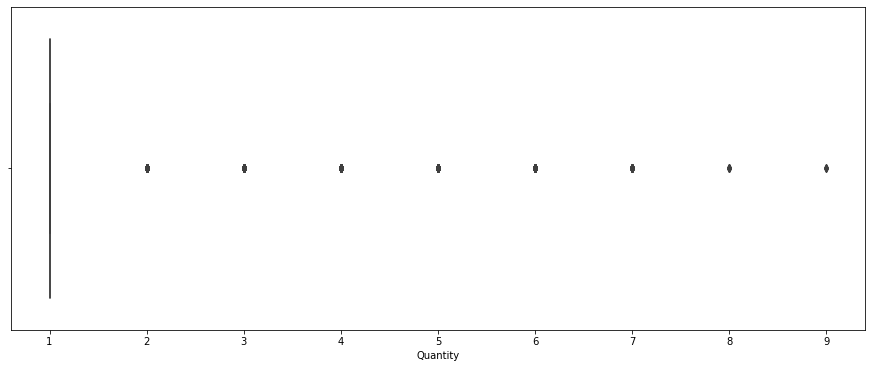

In [17]:
# Plot Quantity
plt.figure(constrained_layout=True, figsize=(12, 5))
sns.boxplot(df['Quantity'])
#sns.boxplot(df.groupby('Order ID')['Quantity'])


In [18]:
df.groupby('Order ID')['Quantity'].agg(['sum']).describe()

,sum
count,178437.000000
mean,1.171724
std,0.501673
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


## Creating New Features

### Column: Order Date

Applying feature extraction on Order Date to get new features such as date, day, month, year, hour, day of week for further analysis.

In [19]:
# Create new features
df['Time'] = df['Order Date'].dt.time

In [20]:
df['date'] = df['Order Date'].dt.date   # df['date'].dt.normalize()  # Show only date
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year
df['hour'] = df['Order Date'].dt.hour
df['dayofweek'] = df['Order Date'].dt.dayofweek

In [21]:
df['dayofweek'] = df['dayofweek'].map( {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'})

In [22]:
df[df['Unit Price'] < 0]

,Order ID,Product,Quantity,Unit Price,Delivery Address,Order Date,Time,date,day,month,year,hour,dayofweek


### Column: Revenue

Revenue is the product of UnitPrice and Quantity from each transaction.

In [23]:
# Create a new feature Revenue
df['Revenue'] = (df['Unit Price'] * df['Quantity']).round(2)

### Column: Product 

In [24]:
# change Product - UPPER case to LOWER case
df['Product'] = df['Product'].str.lower()

### Column: Delivery Address

In [25]:
df['city']=df['Delivery Address'].str.split(',').str[1]

In [26]:
df['city']= df['city'].str.lower()

In [27]:
df.head()

,Order ID,Product,Quantity,Unit Price,Delivery Address,Order Date,Time,date,day,month,year,hour,dayofweek,Revenue,city
0,176558,usb-c charging cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,08:46:00,2019-04-19,19,4,2019,8,Fri,23.90,dallas
2,176559,bose soundsport headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,22:30:00,2019-04-07,7,4,2019,22,Sun,99.99,boston
3,176560,google phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14:38:00,2019-04-12,12,4,2019,14,Fri,600.00,los angeles
4,176560,wired headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14:38:00,2019-04-12,12,4,2019,14,Fri,11.99,los angeles
5,176561,wired headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,09:27:00,2019-04-30,30,4,2019,9,Tue,11.99,los angeles


## Exploratory Data Analysis (EDA)

Which item is bought most and least?

In [28]:
most_prefered_items = df.groupby(['Product', 'Unit Price'])[['Quantity']].sum().sort_values(by=['Quantity'],ascending=False)
most_prefered_items

,,Quantity
Product,Unit Price,
aaa batteries (4-pack),2.99,31017
aa batteries (4-pack),3.84,27635
usb-c charging cable,11.95,23975
lightning charging cable,14.95,23217
wired headphones,11.99,20557
apple airpods headphones,150.00,15661
bose soundsport headphones,99.99,13457
27in fhd monitor,149.99,7550
iphone,700.00,6849


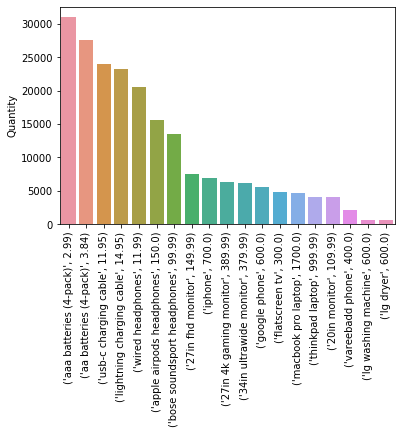

In [29]:
sns.barplot(x=most_prefered_items.index, y=most_prefered_items['Quantity'])
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

AAA batteries(4-pack) and AA batteries(4-pack) are best selling product at the price of 2.99 and 3.84 respectively. This somehow can explain as the unit price is low, people are able to afford more.

Which product brings the most revenue?

In [30]:
Product_Rev = df.groupby('Product')[['Revenue',
                          'Quantity']].agg(['sum']).sort_values(by=[('Revenue', 'sum')], ascending=False)
display(Product_Rev.reset_index())

,Product,Revenue,Quantity
,,sum,sum
0,macbook pro laptop,8037600.00,4728
1,iphone,4794300.00,6849
2,thinkpad laptop,4129958.70,4130
3,google phone,3319200.00,5532
4,27in 4k gaming monitor,2435097.56,6244
5,34in ultrawide monitor,2355558.01,6199
6,apple airpods headphones,2349150.00,15661
7,flatscreen tv,1445700.00,4819
8,bose soundsport headphones,1345565.43,13457


 macbook pro laptop brings the most revenue i.e. $8037600.

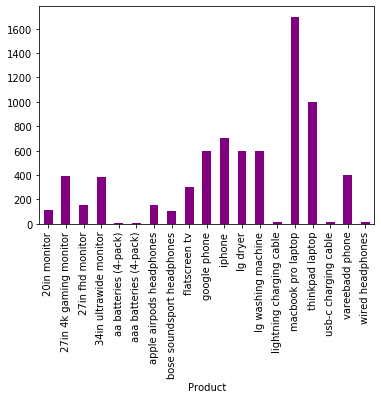

In [31]:
df.groupby('Product')['Unit Price'].mean().sort_index().plot.bar(color="purple")

In [32]:
df.groupby('Order ID')['Revenue'].agg(['sum']).describe()

,sum
count,178437.000000
mean,193.300918
std,341.274261
min,2.990000
25%,11.950000
50%,14.950000
75%,150.000000
max,3779.990000


75% of the people brings the revenue between 2.99 to 150. 

 Which city in US generates the most revenue in total and average?

In [36]:
city_orders=pd.DataFrame(df.groupby(['city'])['Order ID'].nunique())

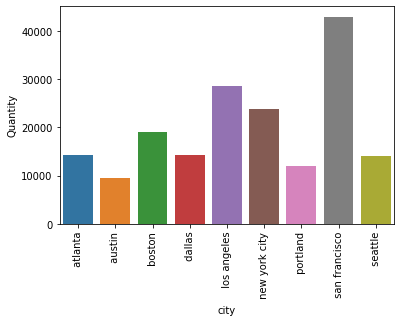

In [37]:
sns.barplot(x=city_orders.index, y=city_orders['Order ID'])
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

,Revenue
,sum
city,
san francisco,8.262204e+06
los angeles,5.452571e+06
new york city,4.664317e+06
boston,3.661642e+06
atlanta,2.795499e+06
dallas,2.767975e+06
seattle,2.747755e+06
portland,2.320491e+06


Text(0, 0.5, 'city')

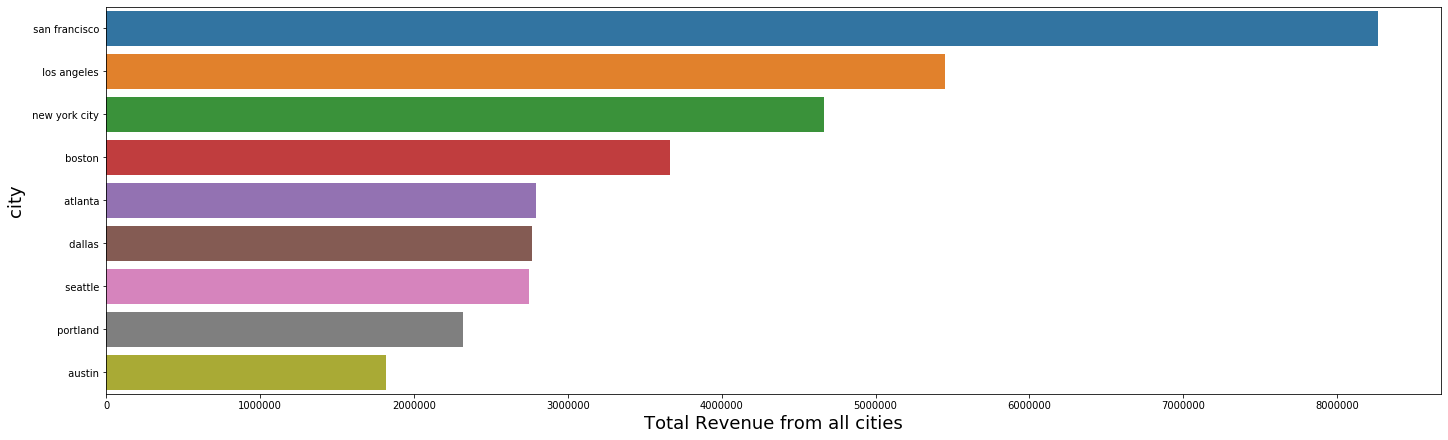

In [38]:
city_revenue = df.groupby('city')[['Revenue']].agg(['sum']).sort_values(by=[('Revenue', 'sum')], ascending=False)
display(city_revenue)

fig = plt.figure(constrained_layout=True, figsize=(20, 6))
a = sns.barplot(y=city_revenue.index, x=city_revenue[('Revenue', 'sum')])
plt.xlabel('Total Revenue from all cities', fontsize=18)
plt.ylabel('city', fontsize=18)

,Unit Price
,mean
city,
atlanta,186.809233
new york city,186.339075
dallas,185.737370
seattle,185.534619
portland,185.138185
san francisco,183.570190
los angeles,183.125662
austin,182.723232


Text(0, 0.5, 'City')

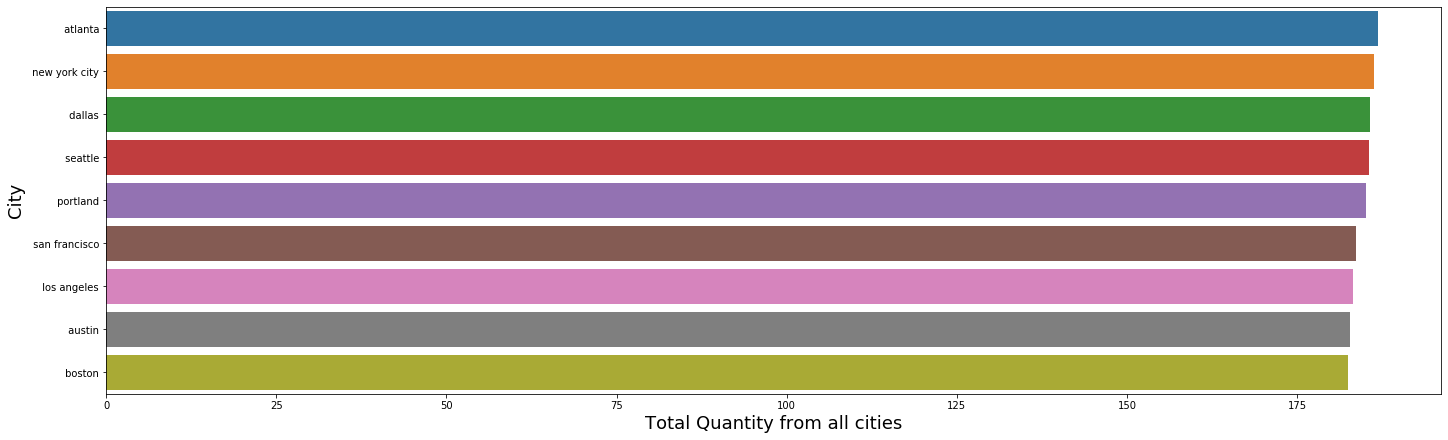

In [39]:
city_quantity = df.groupby('city')[['Unit Price']].agg(['mean']).sort_values(by=[('Unit Price', 'mean')], ascending=False)

display(city_quantity)

fig = plt.figure(constrained_layout=True, figsize=(20, 6))
a = sns.barplot(y=city_quantity.index, x=city_quantity[('Unit Price', 'mean')])
plt.xlabel('Total Quantity from all cities', fontsize=18)
plt.ylabel('City', fontsize=18)


San francisco tops the table in terms of quantity ordered, orders placed and revenue generated. (check: Population of San francisco,cost of living)

 Which month we sell out most and least?

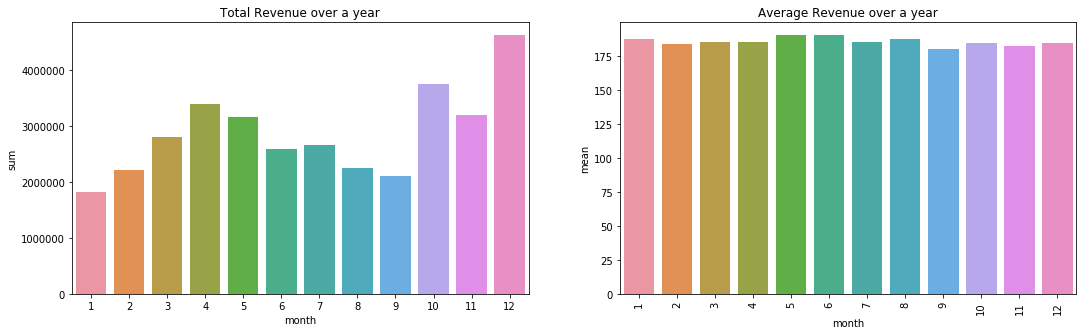

,sum,mean
month,,
1,1.813586e+06,187.450795
2,2.202022e+06,183.884962
3,2.807100e+06,185.250471
4,3.390670e+06,185.495390
5,3.152607e+06,190.305852
6,2.577802e+06,190.187565
7,2.647776e+06,185.249826
8,2.244468e+06,187.648849
9,2.097560e+06,180.497387


In [34]:
year_20l9_df=df[df['year']==2019]
month_sales = year_20l9_df.groupby(['month'])['Revenue'].agg(['sum','mean'])

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes = axes.flatten()

sns.barplot(x=month_sales.index, y=month_sales['sum'], ax=axes[0]).set_title("Total Revenue over a year")
plt.ylabel('a')
plt.xticks(rotation=90)

sns.barplot(x=month_sales.index, y=month_sales['mean'], ax=axes[1]).set_title("Average Revenue over a year")
plt.xticks(rotation=90)
plt.show()

month_sales

Towards the end of the year, sales make a huge jump to over a million in december with $4.6M (Holidays/black friday/chrismas eve)
However, looking at average revenue diagram indicates nothing change drastically.

What time do people tend to buy our products?

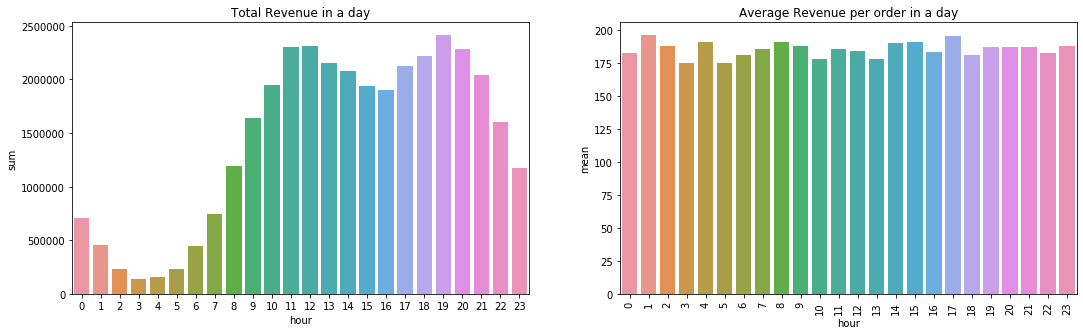

,sum,mean
hour,,
0,711060.59,182.416775
1,458561.97,195.882943
2,232586.50,187.721146
3,144697.99,174.756027
4,162396.09,191.054224
5,230564.88,174.802790
6,448113.00,180.545125
7,744854.12,185.702847
8,1192348.97,190.592866


In [41]:
hour_sales = year_20l9_df.groupby(['hour'])['Revenue'].agg(['sum','mean'])

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes = axes.flatten()

sns.barplot(x=hour_sales.index, y=hour_sales['sum'], ax=axes[0]).set_title("Total Revenue in a day")
plt.ylabel('a')
plt.xticks(rotation=90)

sns.barplot(x=hour_sales.index, y=hour_sales['mean'], ax=axes[1]).set_title("Average Revenue per order in a day")
plt.xticks(rotation=90)
plt.show()

hour_sales


Starting from 7 am, people tend to make purchase on the online retail.Revenue hits the top at 7pm. Afterwards, sales gradually decrease till 10pm onwards. After that only a few of customers left make purchases.
Taking a look at the 2nd image, shows merely the same average revenue for all day. At 1 am the average is comparatively higher than the rest hours in a day. It suggests people make a huge quantity of items per transaction at this time (More time to serve internet, we can add more advertisements).

Which day of a week people tend to visit and purchase stuff?

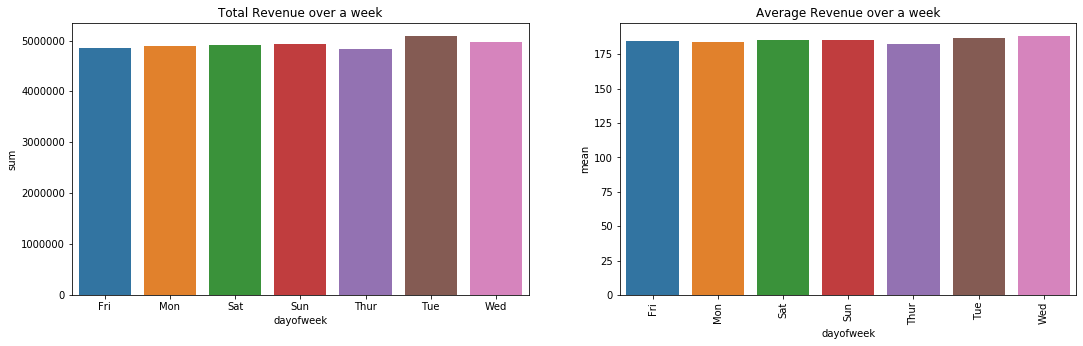

,sum,mean
dayofweek,,
Fri,4.855938e+06,185.009273
Mon,4.883327e+06,183.950229
Sat,4.904357e+06,185.125963
Sun,4.932170e+06,185.762105
Thur,4.839465e+06,182.890486
Tue,5.087957e+06,187.229320
Wed,4.980152e+06,188.335362


In [42]:
dayofweek_sales = year_20l9_df.groupby(['dayofweek'])['Revenue'].agg(['sum','mean'])

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
axes = axes.flatten()

sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales['sum'], ax=axes[0]).set_title("Total Revenue over a week")
plt.ylabel('a')
plt.xticks(rotation=90)

sns.barplot(x=dayofweek_sales.index, y=dayofweek_sales['mean'], ax=axes[1]).set_title("Average Revenue over a week")
plt.xticks(rotation=90)
plt.show()

dayofweek_sales

2 Images merely shows the same distribution, the revenue is almost same, but in comparison Highest revenue was generated on Tuesday-Wednesday

In [43]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
date_item_df = df.set_index('Order Date').groupby([pd.Grouper(freq='M'), 'Product'])['Quantity'].sum()
date_item_df

Order Date  Product                   
2019-01-31  20in monitor                   215
            27in 4k gaming monitor         312
            27in fhd monitor               419
            34in ultrawide monitor         314
            aa batteries (4-pack)         1424
            aaa batteries (4-pack)        1595
            apple airpods headphones       814
            bose soundsport headphones     659
            flatscreen tv                  243
            google phone                   318
            iphone                         379
            lg dryer                        39
            lg washing machine              42
            lightning charging cable      1149
            macbook pro laptop             234
            thinkpad laptop                217
            usb-c charging cable          1283
            vareebadd phone                125
            wired headphones              1081
2019-02-28  20in monitor                   246
            27in 4k g

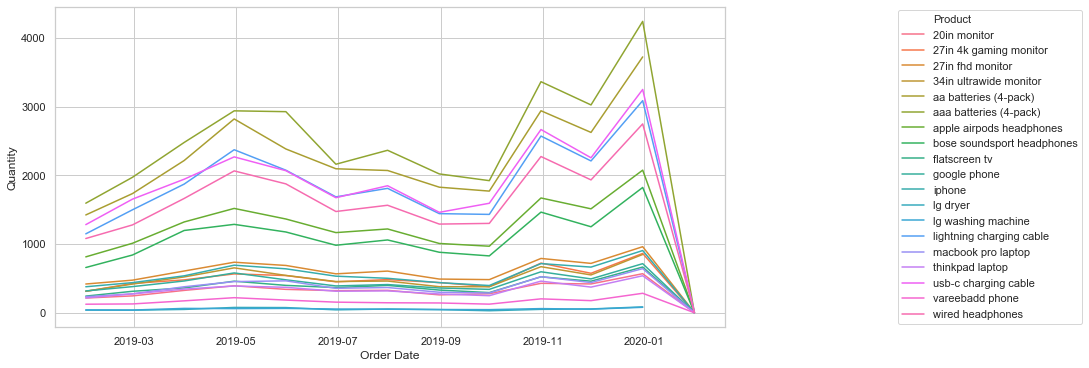

In [44]:
date_item_df = date_item_df.reset_index()

sns.set(style='whitegrid')
plt.figure(constrained_layout=True, figsize=(15, 5))
g=sns.lineplot(x=date_item_df['Order Date'], y=date_item_df['Quantity'], hue=date_item_df['Product'])
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [45]:
date_item_df1 = year_20l9_df.set_index('Order Date').groupby(['month', 'Product'])['Quantity'].sum()

In [46]:
date_item_df1

month  Product                   
1      20in monitor                   215
       27in 4k gaming monitor         312
       27in fhd monitor               419
       34in ultrawide monitor         314
       aa batteries (4-pack)         1424
       aaa batteries (4-pack)        1595
       apple airpods headphones       814
       bose soundsport headphones     659
       flatscreen tv                  243
       google phone                   318
       iphone                         379
       lg dryer                        39
       lg washing machine              42
       lightning charging cable      1149
       macbook pro laptop             234
       thinkpad laptop                217
       usb-c charging cable          1283
       vareebadd phone                125
       wired headphones              1081
2      20in monitor                   246
       27in 4k gaming monitor         427
       27in fhd monitor               475
       34in ultrawide monitor         418


Month wise trend

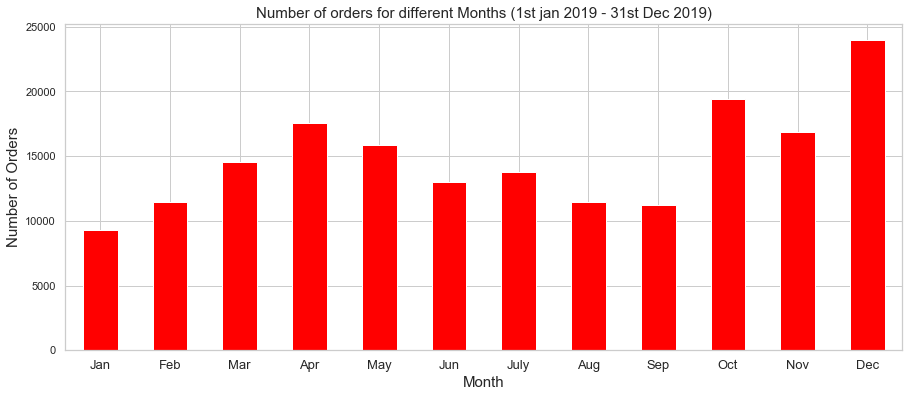

In [47]:
ax = year_20l9_df.groupby('Order ID')['month'].unique().value_counts().sort_index().plot('bar',color="Red",figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st jan 2019 - 31st Dec 2019)',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
plt.show()

In [ ]:
#ax = year_20l9_df.groupby('Order ID')['day'].value_counts().sort_index().plot('bar',color="orange",figsize=(15,6))
#ax.set_xlabel('days',fontsize=15)
#ax.set_ylabel('Number of Orders',fontsize=15)

How many orders per day?

In [35]:
df_2=year_20l9_df.groupby('Order ID')['dayofweek'].unique().value_counts().sort_index()
df_2

[Fri]     25216
[Mon]     25494
[Sat]     25420
[Sun]     25482
[Thur]    25368
[Tue]     26063
[Wed]     25363
Name: dayofweek, dtype: int64

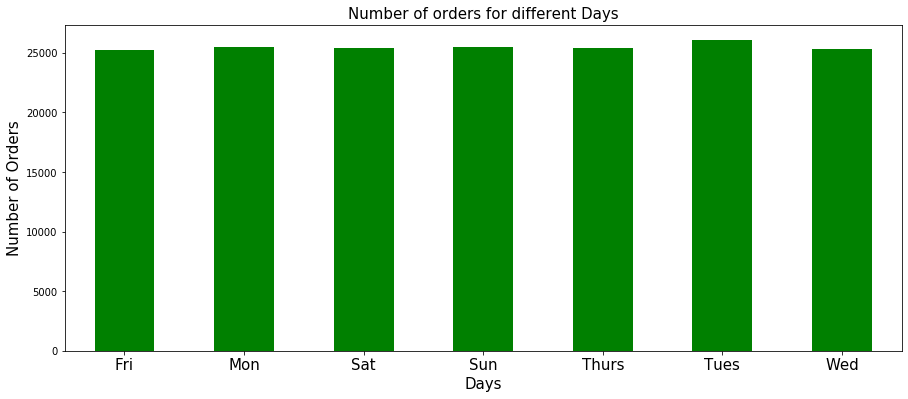

In [36]:
ax = df_2.plot('bar',color='g',figsize=(15,6))
ax.set_xlabel('Days',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Fri','Mon','Sat','Sun','Thurs','Tues','Wed'), rotation='horizontal', fontsize=15)
plt.show()

## Market basket Analysis

In [37]:
import sys
!{sys.executable} -m pip install mlxtend

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 15 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity            185950 non-null int64
Unit Price          185950 non-null float64
Delivery Address    185950 non-null object
Order Date          185950 non-null datetime64[ns]
Time                185950 non-null object
date                185950 non-null object
day                 185950 non-null int64
month               185950 non-null int64
year                185950 non-null int64
hour                185950 non-null int64
dayofweek           185950 non-null object
Revenue             185950 non-null float64
city                185950 non-null object
dtypes: datetime64[ns](1), float64(2), int64(5), object(7)
memory usage: 27.7+ MB


In [40]:
# Stripping extra spaces in the description 
df['city'] = df['city'].str.lstrip() 

In [41]:
df_basket = (df
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [42]:
basket_sanfrancisco = (df[df['city'] =="san francisco"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [43]:
basket_losangeles = (df[df['city'] =="los angeles"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [44]:
basket_newyork = (df[df['city'] =="new york city"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [45]:
basket_boston = (df[df['city'] =="boston"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [46]:
basket_dallas = (df[df['city'] =="dallas"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [47]:
basket_atlanta = (df[df['city'] =="atlanta"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [48]:
basket_seattle = (df[df['city'] =="seattle"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [49]:
basket_portland = (df[df['city'] =="portland"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [50]:
basket_austin = (df[df['city'] =="austin"] 
          .groupby(['Order ID', 'Product'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('Order ID')) 

In [51]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
  
# Encoding the datasets 
basket_encoded = df_basket.applymap(hot_encode) 
df_basket = basket_encoded 
 
basket_encoded =basket_sanfrancisco.applymap(hot_encode) 
basket_sanfrancisco = basket_encoded 
    
basket_encoded = basket_losangeles.applymap(hot_encode) 
basket_losangeles = basket_encoded 
  
basket_encoded = basket_newyork.applymap(hot_encode) 
basket_newyork = basket_encoded 
  
basket_encoded = basket_boston.applymap(hot_encode) 
basket_boston = basket_encoded 

basket_encoded = basket_dallas.applymap(hot_encode) 
basket_dallas = basket_encoded

basket_encoded = basket_atlanta.applymap(hot_encode) 
basket_atlanta = basket_encoded

basket_encoded = basket_seattle.applymap(hot_encode) 
basket_seattle = basket_encoded

basket_encoded = basket_portland.applymap(hot_encode) 
basket_portland = basket_encoded

basket_encoded = basket_austin.applymap(hot_encode) 
basket_austin  = basket_encoded

In [65]:
frequent_itemsets = apriori(df_basket, min_support=0.001, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.022966,(20in monitor),1
1,0.034886,(27in 4k gaming monitor),1
2,0.042020,(27in fhd monitor),1
3,0.034600,(34in ultrawide monitor),1
4,0.115122,(aa batteries (4-pack)),1
5,0.115408,(aaa batteries (4-pack)),1
6,0.087005,(apple airpods headphones),1
7,0.074525,(bose soundsport headphones),1
8,0.026867,(flatscreen tv),1
9,0.030946,(google phone),1


In [53]:
frequent_itemsets1 = apriori(basket_sanfrancisco, min_support=0.02, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.023148,(20in monitor),1
1,0.033894,(27in 4k gaming monitor),1
2,0.041937,(27in fhd monitor),1
3,0.033545,(34in ultrawide monitor),1
4,0.114085,(aa batteries (4-pack)),1
5,0.114761,(aaa batteries (4-pack)),1
6,0.086274,(apple airpods headphones),1
7,0.076507,(bose soundsport headphones),1
8,0.026761,(flatscreen tv),1
9,0.031563,(google phone),1


In [54]:
# Advanced and strategical data frequent set selection
frequent_itemsets[(frequent_itemsets['support'] >= 0.05)]

,support,itemsets,length
4,0.115122,(aa batteries (4-pack)),1
5,0.115408,(aaa batteries (4-pack)),1
6,0.087005,(apple airpods headphones),1
7,0.074525,(bose soundsport headphones),1
11,0.121074,(lightning charging cable),1
14,0.122480,(usb-c charging cable),1
16,0.105623,(wired headphones),1


In [66]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(google phone),(usb-c charging cable),0.030946,0.122480,0.005587,0.180551,1.474120,0.001797,1.070865
1,(usb-c charging cable),(google phone),0.122480,0.030946,0.005587,0.045619,1.474120,0.001797,1.015374
2,(lightning charging cable),(iphone),0.121074,0.038333,0.005666,0.046797,1.220804,0.001025,1.008880
3,(iphone),(lightning charging cable),0.038333,0.121074,0.005666,0.147807,1.220804,0.001025,1.031370
4,(vareebadd phone),(usb-c charging cable),0.011573,0.122480,0.002062,0.178208,1.454996,0.000645,1.067813
5,(usb-c charging cable),(vareebadd phone),0.122480,0.011573,0.002062,0.016838,1.454996,0.000645,1.005356


In [60]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False)

,antecedents,consequents,support,confidence,lift
2,(lightning charging cable),(iphone),0.005666,0.046797,1.220804
3,(iphone),(lightning charging cable),0.005666,0.147807,1.220804
0,(google phone),(usb-c charging cable),0.005587,0.180551,1.474120
1,(usb-c charging cable),(google phone),0.005587,0.045619,1.474120
4,(vareebadd phone),(usb-c charging cable),0.002062,0.178208,1.454996
5,(usb-c charging cable),(vareebadd phone),0.002062,0.016838,1.454996


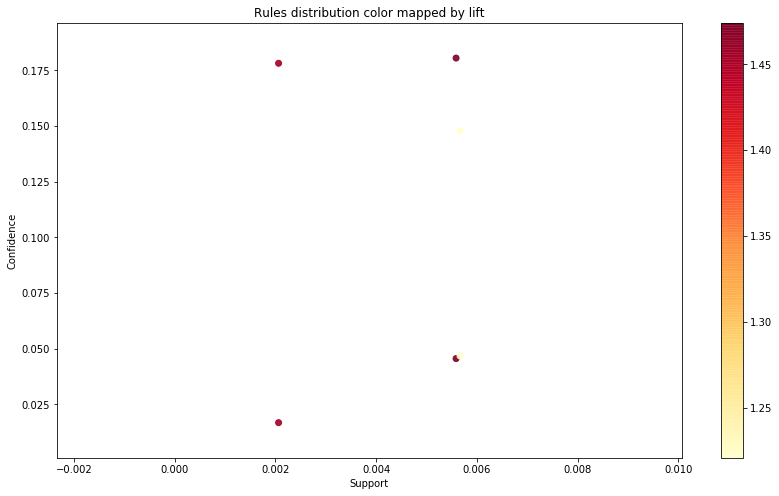

In [67]:
# Visualizing the rules distribution color mapped by Lift
plt.figure(figsize=(14, 8))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

Apriori limitations:A large number of possibilities in a single basket among an even larger number of baskets. The consequence of it is having a "sparse matrix", full of 0s which causes the support of basket occourances to drop drastically. The output achieved has its top support of 0.051 (5%). Such limitation might be overcome by working with the entire data set

## Modelling

predicting which features have most influence on Revenue to boost up marketing campaigns 

In [68]:
df_new=df.copy()

In [69]:
df_new.head()

,Order ID,Product,Quantity,Unit Price,Delivery Address,Order Date,Time,date,day,month,year,hour,dayofweek,Revenue,city
0,176558,usb-c charging cable,2,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,08:46:00,2019-04-19,19,4,2019,8,Fri,23.90,dallas
2,176559,bose soundsport headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,22:30:00,2019-04-07,7,4,2019,22,Sun,99.99,boston
3,176560,google phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14:38:00,2019-04-12,12,4,2019,14,Fri,600.00,los angeles
4,176560,wired headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,14:38:00,2019-04-12,12,4,2019,14,Fri,11.99,los angeles
5,176561,wired headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,09:27:00,2019-04-30,30,4,2019,9,Tue,11.99,los angeles


In [70]:
df_new.columns

Index(['Order ID', 'Product', 'Quantity', 'Unit Price', 'Delivery Address',
       'Order Date', 'Time', 'date', 'day', 'month', 'year', 'hour',
       'dayofweek', 'Revenue', 'city'],
      dtype='object')

In [71]:
df_ = df_new.groupby(by='Order ID', as_index=False)['date'].min()

In [72]:
df_join = df_new.groupby('Order ID')[['Quantity']].sum()

In [73]:
df_clean = df_.merge(df_join, how='inner', on='Order ID')

In [74]:
df_clean.head()

,Order ID,date,Quantity
0,141234,2019-01-22,1
1,141235,2019-01-28,1
2,141236,2019-01-17,2
3,141237,2019-01-05,1
4,141238,2019-01-25,1


In [75]:
df_join2 = df_new.groupby(by='Order ID', as_index=False)['Unit Price'].mean()

In [76]:
df_final = pd.merge(df_clean,df_join2, on='Order ID',how='inner')

In [77]:
df_final.head()

,Order ID,date,Quantity,Unit Price
0,141234,2019-01-22,1,700.00
1,141235,2019-01-28,1,14.95
2,141236,2019-01-17,2,11.99
3,141237,2019-01-05,1,149.99
4,141238,2019-01-25,1,11.99


In [78]:
df_join3 = df_new.groupby(by='Order ID', as_index=False)['Revenue'].sum()

In [79]:
df_final1 = pd.merge(df_final,df_join3, on='Order ID',how='inner')
df_final1.head()

,Order ID,date,Quantity,Unit Price,Revenue
0,141234,2019-01-22,1,700.00,700.00
1,141235,2019-01-28,1,14.95,14.95
2,141236,2019-01-17,2,11.99,23.98
3,141237,2019-01-05,1,149.99,149.99
4,141238,2019-01-25,1,11.99,11.99


In [80]:
df_join4 = df_new.groupby('Order ID')[['city']].first()

In [81]:
df_final2 = pd.merge(df_final1,df_join4, on='Order ID',how='inner')

In [82]:
df_join5 = df_new.groupby('Order ID')[['Order Date']].min()

In [83]:
df_final3 = pd.merge(df_final2,df_join5, on='Order ID',how='inner')

In [137]:
df_final3.head()

,Order ID,date,Quantity,Unit Price,Revenue,city,Order Date
0,141234,2019-01-22,1,700.00,700.00,boston,2019-01-22 21:25:00
1,141235,2019-01-28,1,14.95,14.95,portland,2019-01-28 14:15:00
2,141236,2019-01-17,2,11.99,23.98,san francisco,2019-01-17 13:33:00
3,141237,2019-01-05,1,149.99,149.99,los angeles,2019-01-05 20:33:00
4,141238,2019-01-25,1,11.99,11.99,austin,2019-01-25 11:59:00


In [85]:
df_join6 = df_new.groupby(by='Order ID', as_index=False)['Product'].sum()

In [86]:
df_final4 = pd.merge(df_final3,df_join6, on='Order ID',how='inner')

In [87]:
df_final4.head()

,Order ID,date,Quantity,Unit Price,Revenue,city,Order Date,Product
0,141234,2019-01-22,1,700.00,700.00,boston,2019-01-22 21:25:00,iphone
1,141235,2019-01-28,1,14.95,14.95,portland,2019-01-28 14:15:00,lightning charging cable
2,141236,2019-01-17,2,11.99,23.98,san francisco,2019-01-17 13:33:00,wired headphones
3,141237,2019-01-05,1,149.99,149.99,los angeles,2019-01-05 20:33:00,27in fhd monitor
4,141238,2019-01-25,1,11.99,11.99,austin,2019-01-25 11:59:00,wired headphones


In [89]:
df_final=df_final4.copy()

In [90]:
df_final['day'] = df_final['Order Date'].dt.day
df_final['month'] = df_final['Order Date'].dt.month
df_final['year'] = df_final['Order Date'].dt.year
df_final['hour'] = df_final['Order Date'].dt.hour
df_final['dayofweek'] = df_final['Order Date'].dt.dayofweek
df_final['dayofweek'] = df_final['dayofweek'].map( {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'})
df_final.drop(["Order Date"], axis=1, inplace=True)

In [91]:
df_final.head()

,Order ID,date,Quantity,Unit Price,Revenue,city,Product,day,month,year,hour,dayofweek
0,141234,2019-01-22,1,700.00,700.00,boston,iphone,22,1,2019,21,Tue
1,141235,2019-01-28,1,14.95,14.95,portland,lightning charging cable,28,1,2019,14,Mon
2,141236,2019-01-17,2,11.99,23.98,san francisco,wired headphones,17,1,2019,13,Thur
3,141237,2019-01-05,1,149.99,149.99,los angeles,27in fhd monitor,5,1,2019,20,Sat
4,141238,2019-01-25,1,11.99,11.99,austin,wired headphones,25,1,2019,11,Fri


In [92]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178437 entries, 0 to 178436
Data columns (total 12 columns):
Order ID      178437 non-null object
date          178437 non-null object
Quantity      178437 non-null int64
Unit Price    178437 non-null float64
Revenue       178437 non-null float64
city          178437 non-null object
Product       178437 non-null object
day           178437 non-null int64
month         178437 non-null int64
year          178437 non-null int64
hour          178437 non-null int64
dayofweek     178437 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 17.7+ MB


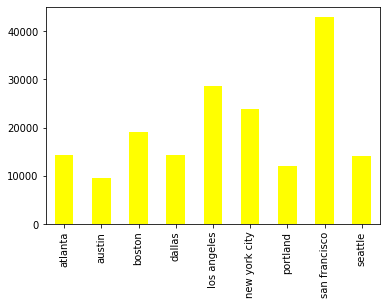

In [93]:
df_final['city'].value_counts().sort_index().plot.bar(color="yellow")

In [94]:
df_final.describe()

,Quantity,Unit Price,Revenue,day,month,year,hour
count,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000,178437.000000
mean,1.171724,181.595769,193.300918,15.761557,7.061495,2019.000174,14.411916
std,0.501673,328.341949,341.274261,8.782257,3.502690,0.013180,5.423222
min,1.000000,2.990000,2.990000,1.000000,1.000000,2019.000000,0.000000
25%,1.000000,11.950000,11.950000,8.000000,4.000000,2019.000000,11.000000
50%,1.000000,14.950000,14.950000,16.000000,7.000000,2019.000000,15.000000
75%,1.000000,150.000000,150.000000,23.000000,10.000000,2019.000000,19.000000
max,9.000000,1700.000000,3779.990000,31.000000,12.000000,2020.000000,23.000000


In [95]:
df_final = pd.get_dummies(df_final, prefix=['city'], columns=['city'])

In [96]:
df_final = pd.get_dummies(df_final, prefix=['day'], columns=['dayofweek'])
df_final.head()

,Order ID,date,Quantity,Unit Price,Revenue,Product,day,month,year,hour,...,city_portland,city_san francisco,city_seattle,day_Fri,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,141234,2019-01-22,1,700.00,700.00,iphone,22,1,2019,21,...,0,0,0,0,0,0,0,0,1,0
1,141235,2019-01-28,1,14.95,14.95,lightning charging cable,28,1,2019,14,...,1,0,0,0,1,0,0,0,0,0
2,141236,2019-01-17,2,11.99,23.98,wired headphones,17,1,2019,13,...,0,1,0,0,0,0,0,1,0,0
3,141237,2019-01-05,1,149.99,149.99,27in fhd monitor,5,1,2019,20,...,0,0,0,0,0,1,0,0,0,0
4,141238,2019-01-25,1,11.99,11.99,wired headphones,25,1,2019,11,...,0,0,0,1,0,0,0,0,0,0


In [97]:
df_final = pd.get_dummies(df_final, prefix=['month'], columns=['month'])
df_final.head()

,Order ID,date,Quantity,Unit Price,Revenue,Product,day,year,hour,city_atlanta,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,141234,2019-01-22,1,700.00,700.00,iphone,22,2019,21,0,...,0,0,0,0,0,0,0,0,0,0
1,141235,2019-01-28,1,14.95,14.95,lightning charging cable,28,2019,14,0,...,0,0,0,0,0,0,0,0,0,0
2,141236,2019-01-17,2,11.99,23.98,wired headphones,17,2019,13,0,...,0,0,0,0,0,0,0,0,0,0
3,141237,2019-01-05,1,149.99,149.99,27in fhd monitor,5,2019,20,0,...,0,0,0,0,0,0,0,0,0,0
4,141238,2019-01-25,1,11.99,11.99,wired headphones,25,2019,11,0,...,0,0,0,0,0,0,0,0,0,0


Possible columns that could be added:
•	Different seasons
•	Public Holiday
•	Promotions
•	Weekend
•	School Holiday
•	StartOfMonth_Initial10Days
•	MidOfMonth
•	EndOFMonth_last10Days
•	Last 5 days/ Last 3 days
•	Moving Average
•	Lag sales
•	Difference of sales
•	Month
•	Quarter
•	Days
•	First six month/last six month?


### discretization

In [98]:
df_final['UP_bins']=pd.qcut(df_final['Unit Price'], q=5)

In [99]:
df_final['UP_bins'].value_counts()

(2.9890000000000003, 3.84]    39805
(3.84, 11.99]                 37674
(300.0, 1700.0]               35599
(11.99, 99.99]                33467
(99.99, 300.0]                31892
Name: UP_bins, dtype: int64

In [100]:
bin_labels_5 = ['(3-4]','(4-12]','(300-1700]','(11-100]','(100,300]']

In [101]:
df_final['UP_bins'] = pd.qcut(df_final['Unit Price'],
                              q=5,
                              labels=bin_labels_5)

In [102]:
df_final['hours_bins']=pd.qcut(df_final['hour'], q=4)

In [103]:
df_final['hours_bins'].value_counts()

(-0.001, 11.0]    53111
(15.0, 19.0]      44574
(11.0, 15.0]      44047
(19.0, 23.0]      36705
Name: hours_bins, dtype: int64

In [104]:
bin_labels_4 = ['>12AM-11AM','>3PM-7PM','>11AM-3PM','>7PM-11PM']
df_final['hours_bins'] = pd.qcut(df_final['hour'],
                              q=4,
                              labels=bin_labels_4)

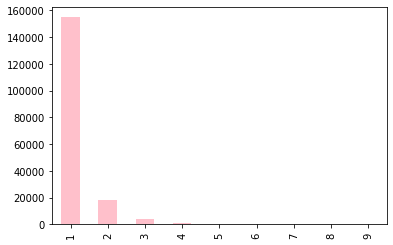

In [105]:
#discrtization will be skewed
df_final['Quantity'].value_counts().sort_index().plot.bar(color="pink")

In [106]:
df_final = pd.get_dummies(df_final, prefix=['UP'], columns=['UP_bins'])

In [107]:
df_final = pd.get_dummies(df_final, prefix=['time'], columns=['hours_bins'])

In [108]:
df_final.head()

,Order ID,date,Quantity,Unit Price,Revenue,Product,day,year,hour,city_atlanta,...,month_12,UP_(3-4],UP_(4-12],UP_(300-1700],UP_(11-100],"UP_(100,300]",time_>12AM-11AM,time_>3PM-7PM,time_>11AM-3PM,time_>7PM-11PM
0,141234,2019-01-22,1,700.00,700.00,iphone,22,2019,21,0,...,0,0,0,0,0,1,0,0,0,1
1,141235,2019-01-28,1,14.95,14.95,lightning charging cable,28,2019,14,0,...,0,0,0,1,0,0,0,1,0,0
2,141236,2019-01-17,2,11.99,23.98,wired headphones,17,2019,13,0,...,0,0,1,0,0,0,0,1,0,0
3,141237,2019-01-05,1,149.99,149.99,27in fhd monitor,5,2019,20,0,...,0,0,0,0,1,0,0,0,0,1
4,141238,2019-01-25,1,11.99,11.99,wired headphones,25,2019,11,0,...,0,0,1,0,0,0,1,0,0,0


In [109]:
df_final.drop(["date",'Quantity','Order ID','Unit Price','hour'], axis=1, inplace=True)

In [110]:
df_test_set=df_final[df_final['year']==2020]
df_train_set=df_final[df_final['year']==2019]

In [111]:
df_final.drop(['year','day'],axis=1,inplace=True)

In [119]:
df_final.drop(['hour'],axis=1,inplace=True)

In [120]:
df_final.to_csv(r'cleaned_data.csv', index = False)

In [117]:
df_final.corr()['Revenue'].sort_values(ascending = False)

Revenue               1.000000
UP_(100,300]          0.795877
month_5               0.005283
month_6               0.004236
day_Wed               0.003767
city_new york city    0.002629
city_atlanta          0.002446
day_Tue               0.002323
month_1               0.001915
time_>11AM-3PM        0.001899
hour                  0.001840
month_8               0.001646
city_seattle          0.001128
city_dallas           0.000931
time_>7PM-11PM        0.000628
city_portland         0.000311
day_Sun               0.000304
month_4               0.000137
month_3              -0.000314
day_Sat              -0.000439
time_>3PM-7PM        -0.000643
month_7              -0.000753
day_Fri              -0.000864
month_10             -0.001068
city_san francisco   -0.001154
month_12             -0.001278
month_2              -0.001349
city_austin          -0.001354
city_boston          -0.001533
time_>12AM-11AM      -0.001746
day_Mon              -0.002097
city_los angeles     -0.002516
day_Thur

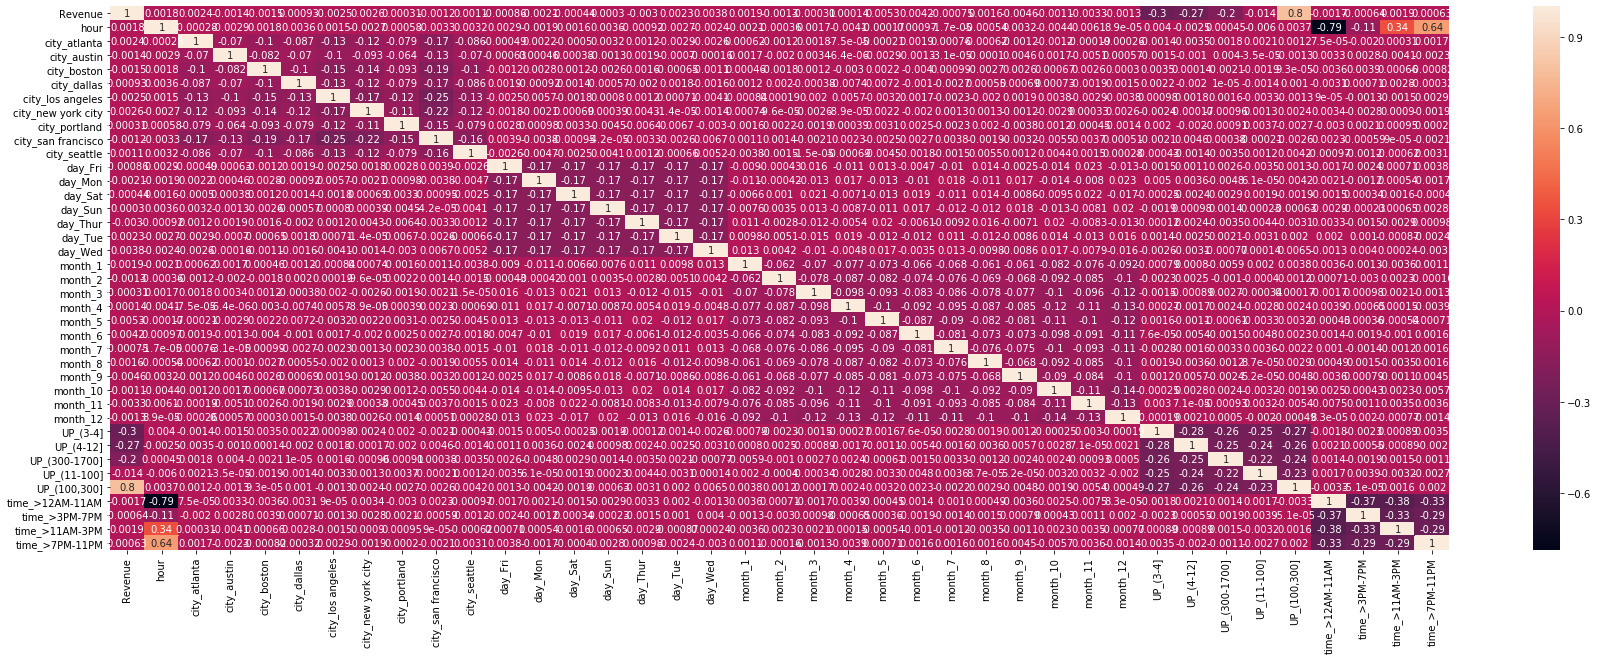

In [118]:
corrMatrix = df_final.corr()
plt.figure(figsize = (30,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [128]:
#df_final_1=df_final.drop(['Product'],axis=1,inplace=True)
#X1 = df_final_1.iloc[:, 1:].values
#Y1 = df_final_1.iloc[:, 0].values
y1 = df_final['Revenue']
X1 = df_final.drop(columns=['Revenue'])

## Train-Test Split.

Splitting  data into train-test data to be able to train our model and validate its capabilities

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.3,random_state=0)

## Regression Algorithms

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()
# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()
# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5
models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

   #scores
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # performance metrics
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))


Tuned Parameters: {'fit_intercept': False}
Best score is 0.665394821257691
R2 score for LinearRegression
0.6687567714140845
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.6122835822032625
R2 score for DecisionTreeRegressor
0.6215279223259529


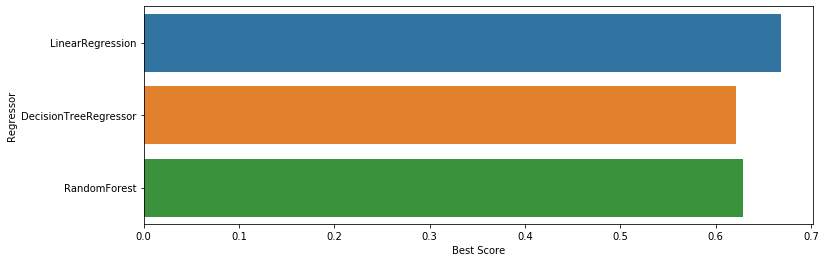

In [150]:
summary_columns = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_columns
summary = summary.reset_index()
# Visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best scores')
sns.barplot(x='Best Score', y='Regressor', data=summary)

This is a basic analysis of a transactions dataset with a model that predicts sales. 